# PrincipalComponentAnalysis（主成分分析）

## 1.概述
### 1.1 作用
* 一个非监督的机器学习算法
* 主要用于数据的降维
* 通过降维，可以发现更便于人类理解的特征
* 其他应用：可视化；去躁

![](../image/pca1-1.png)

### 1.2 解决的问题

* 如何找到这个让样本间间距最大的轴？
* 如何定义样本间间距？
* 使用方差（Variance） $Var(x) = \frac{1}{m}\sum_{i=1}^m(x_i - \overline{x})^2$

![](../image/pca1-2.png)

#### 1.2.1 任务化简

![](../image/pca1-3.png)

### 1.3 总结

* 对所有的样本进行demean处理
* 我们想要求一个轴的方向w=(w1, w2)
* 使得我们所有的样本，映射到w以后，有： $ Var(X_{project}) = \frac{1}{m}\sum_{i=1}^m||{x_{project}}^{(i)} - \overline{x}_{project}||^2 $ 最大 即 $ Var(X_{project}) = \frac{1}{m}\sum_{i=1}^m||{x_{project}}^{(i)}||^2 $ 最大

### 1.4 目标
![](../image/pca1-4.png)
目标：求w，使得 $ Var(X_{project}) = \frac{1}{m}\sum_{i=1}^m(X^{(i)}·w)^2 $ 最大

 $ Var(X_{project}) = \frac{1}{m}\sum_{i=1}^m(X_1^{(i)}·w_1 + X_2^{(i)}·w_2 + ... + X_n^{(i)}·w_n)^2 $ 
 
 $ Var(X_{project}) = \frac{1}{m}\sum_{i=1}^m(\sum_{j=1}^nX_j^{(i)}w_j)^2 $ 
 
 
 一个目标函数的最优化问题，使用梯度上升法解决

## 2.梯度上升法解决主要成分分析问题
* 目标：求w，使得 $ f(X) = \frac{1}{m}\sum_{i=1}^m(X_1^{(i)}·w_1 + X_2^{(i)}·w_2 + ... + X_n^{(i)}·w_n)^2 $  最大

$$ \nabla{f}=
\left\{
 \begin{matrix}
   \frac{∂J}{∂w_1} \\
   \frac{∂J}{∂w_2} \\
   \vdots \\
   \frac{∂J}{∂w_n}
  \end{matrix} 
\right\}
= \frac{2}{m}·
\left\{
 \begin{matrix}
   \sum_{i=1}^m(X_1^{(i)}·w_1 + X_2^{(i)}·w_2 + ... + X_n^{(i)}·w_n)X_1{(i)} \\
   \sum_{i=1}^m(X_1^{(i)}·w_1 + X_2^{(i)}·w_2 + ... + X_n^{(i)}·w_n)X_2{(i)} \\
   \vdots \\
   \sum_{i=1}^m(X_1^{(i)}·w_1 + X_2^{(i)}·w_2 + ... + X_n^{(i)}·w_n)X_n{(i)}
  \end{matrix} 
\right\}
=
\left\{
 \begin{matrix}
   \sum_{i=1}^m(X^{(i)}w)X_1{(i)} \\
   \sum_{i=1}^m(X^{(i)}w)X_2{(i)} \\
   \vdots \\
   \sum_{i=1}^m(X^{(i)}w)X_n{(i)}
  \end{matrix} 
\right\}
$$

$$ \nabla{f}=
\frac{2}{m}·(X^{(1)}w, X^{(2)}w, X^{(3)}w, ... X^{(m)}w)
.\left\{
 \begin{matrix}
   X_1^{(1)} & X_2^{(1)} & X_3^{(1)} \cdots  & X_n^{(1)} \\
   X_1^{(2)} & X_2^{(2)} & X_3^{(2)} \cdots  & X_n^{(2)} \\
   X_1^{(3)} & X_2^{(3)} & X_3^{(3)} \cdots  & X_n^{(3)} \\
   \vdots & \vdots & \vdots & \vdots & \vdots\\
   X_1^{(m)} & X_2^{(m)} & X_3^{(m)} \cdots  & X_n^{(m)}
  \end{matrix} 
\right\}
= \frac{2}{m}·(Xw)^T·X
= \frac{2}{m}·X^T(Xw)
$$


## 3.使用梯度上升法求解主要成分

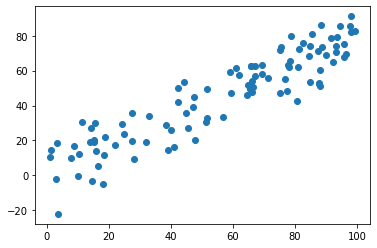

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

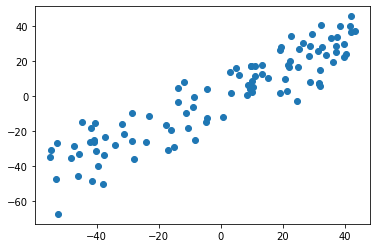

In [2]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [3]:
print(np.mean(X_demean[:,0]))
print(np.mean(X_demean[:,1]))

2.9132252166164106e-15
1.2647660696529783e-14


### 梯度上升法

In [4]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [5]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.73778422, 0.83322962])

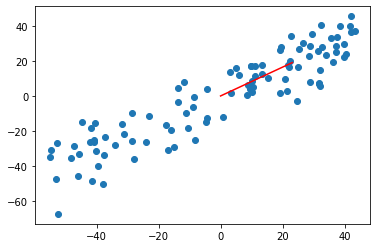

In [6]:
eta = 0.001
# 注意3：不能使用StandardScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

### 使用极端数据集测试

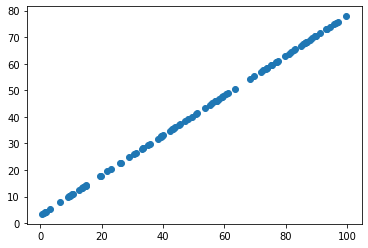

In [7]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

plt.scatter(X2[:,0], X2[:,1])
plt.show()

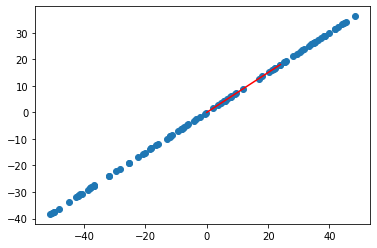

In [8]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

## 求出第一主成分以后，如何求出下一个主成分？
* 数据进行改变，将数据在第一个主成分上的分量去掉
* 在新的数据上求第一主成分


![](../image/pca1-5.png)

In [9]:
def df(w, X, epsilon=0.0001):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77510076, 0.63183765])

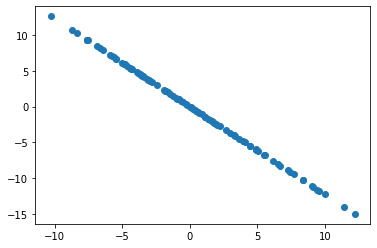

In [10]:
X2 = X - X.dot(w).reshape(-1, 1) * w 

plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [11]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63183554,  0.77510247])

In [12]:
w.dot(w2)

2.7131055526652403e-06

In [13]:

def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

first_n_components(2, X)

[array([0.77111826, 0.63669194]), array([ 0.63669587, -0.77111502])]

## 4 高维数据向低维数据映射
### 映射公式
$$ X_k = X·{W_k}^T $$
$$ X:m*n·W_k:n*k = m*k $$
$
X=
\left\{
 \begin{matrix}
   X_1^{(1)} & X_2^{(1)} & \cdots & X_n^{(1)}\\
   X_1^{(2)} & X_2^{(2)} & \cdots & X_n^{(2)} \\
   \cdots & \cdots & \cdots & \cdots \\
   X_1^{(m)} & X_2^{(m)} & \cdots & X_n^{(m)}
  \end{matrix} 
\right\}
$   $
W_k=
\left\{
 \begin{matrix}
   W_1^{(1)} & W_2^{(1)} & \cdots & W_n^{(1)}\\
   W_1^{(2)} & W_2^{(2)} & \cdots & W_n^{(2)} \\
   \cdots & \cdots & \cdots & \cdots \\
   W_1^{(k)} & W_2^{(k)} & \cdots & W_n^{(k)}
  \end{matrix} 
\right\}
$

### 数据恢复
$$ X_k·W_k = X_m $$
$$ X_K:m * k·W_k:k*n = m*n $$ 
$
X_k=
\left\{
 \begin{matrix}
   X_1^{(1)} & X_2^{(1)} & \cdots & X_n^{(1)}\\
   X_1^{(2)} & X_2^{(2)} & \cdots & X_n^{(2)} \\
   \cdots & \cdots & \cdots & \cdots \\
   X_1^{(m)} & X_2^{(m)} & \cdots & X_k^{(m)}
  \end{matrix} 
\right\}
$   $
W_k=
\left\{
 \begin{matrix}
   W_1^{(1)} & W_2^{(1)} & \cdots & W_n^{(1)}\\
   W_1^{(2)} & W_2^{(2)} & \cdots & W_n^{(2)} \\
   \cdots & \cdots & \cdots & \cdots \\
   W_1^{(k)} & W_2^{(k)} & \cdots & W_n^{(k)}
  \end{matrix} 
\right\}
$

In [14]:
%run PCA.py
%run preprocessing.py

In [15]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [16]:
from PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [17]:
pca.components_

array([[ 0.7757545 ,  0.63103483],
       [-0.63103089,  0.7757577 ]])

In [18]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [19]:
X_reduction = pca.transform(X)

In [20]:
X_reduction.shape

(100, 1)

In [21]:
X_restore = pca.inverse_transform(X_reduction)

In [22]:
X_restore.shape

(100, 2)

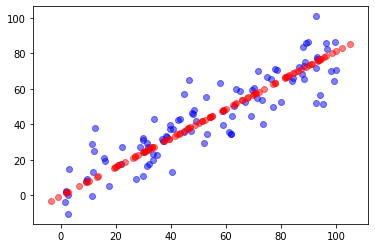

In [23]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

## 5 scikit-learn中的PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.components_

array([[-0.7757544 , -0.63103495]])

In [26]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [28]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

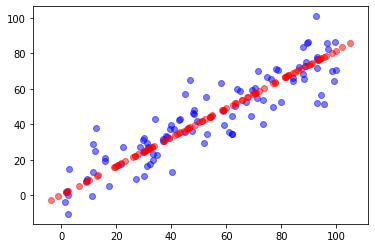

In [29]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

### 2.1 实际案例

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_train.shape

(1347, 64)

In [35]:
%%time 

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 3.95 ms, sys: 926 µs, total: 4.88 ms
Wall time: 4.47 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [39]:
%%time 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.09 ms, sys: 64 µs, total: 1.16 ms
Wall time: 1.16 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

In [41]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [42]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

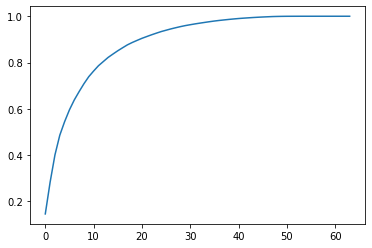

In [46]:
# 累计方差总和图
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [47]:
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [48]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [49]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 2.41 ms, sys: 414 µs, total: 2.82 ms
Wall time: 2.77 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knn_clf.score(X_test_reduction, y_test)

0.98

In [51]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [52]:
X_reduction.shape

(1797, 2)

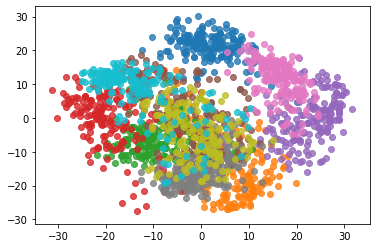

In [53]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i,1],alpha=0.8)
plt.show()

## 6 MNIST

In [56]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [57]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [58]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [59]:
X_train.shape

(60000, 784)

In [60]:
y_train.shape

(60000,)

In [61]:
X_test.shape

(10000, 784)

In [62]:
y_test.shape

(10000,)

### 6.1 使用kNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 19.7 s, sys: 621 ms, total: 20.3 s
Wall time: 21.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
%time knn_clf.score(X_test, y_test)

CPU times: user 11min 53s, sys: 5.84 s, total: 11min 59s
Wall time: 12min 24s


0.9688

### 6.2 PCA进行降维

In [65]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)

X_train_reduction = pca.transform(X_train)
X_train_reduction.shape

(60000, 87)

In [66]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 458 ms, sys: 9.02 ms, total: 467 ms
Wall time: 513 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
X_test_reduction = pca.transform(X_test)
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 1min, sys: 510 ms, total: 1min 1s
Wall time: 1min 3s


0.9728

## 7 使用PCA降噪
### 7.1 回忆我们之前的例子

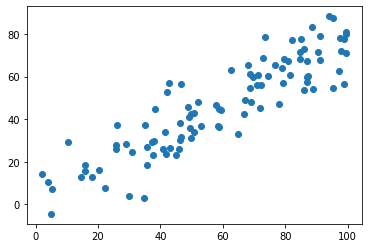

In [68]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

plt.scatter(X[:,0], X[:,1])
plt.show()

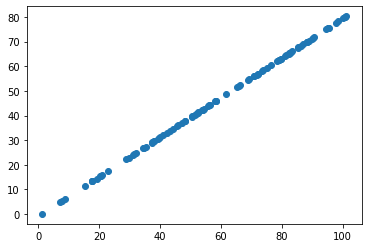

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

### 7.2 手写识别的例子

In [72]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [73]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])
example_digits.shape

(100, 64)

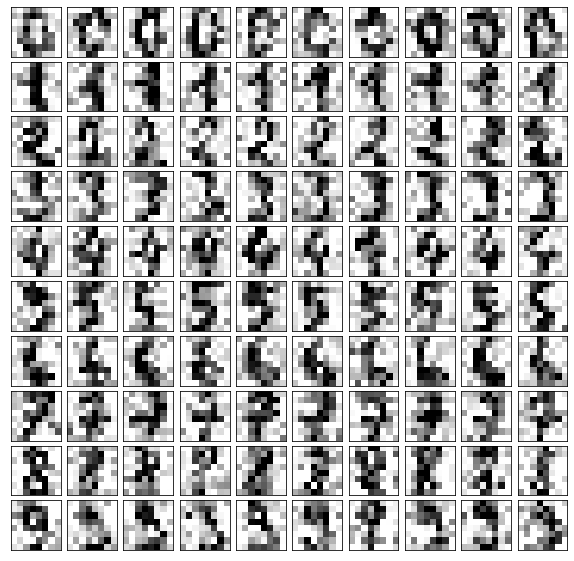

In [74]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [75]:
pca = PCA(0.5)
pca.fit(noisy_digits)
pca.n_components_

12

In [76]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

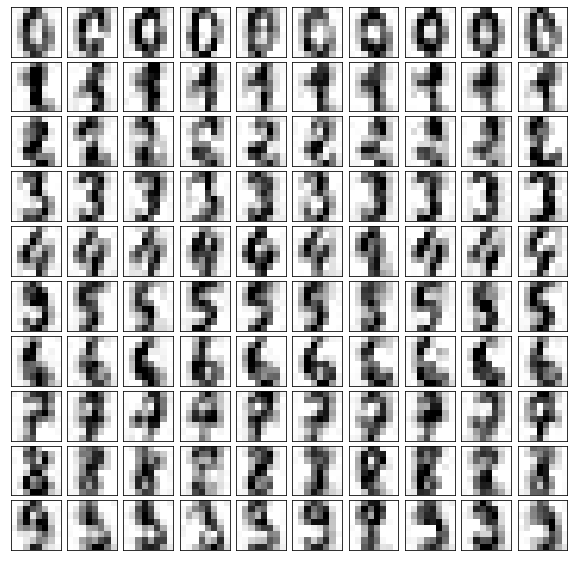

In [77]:
plot_digits(filtered_digits)

## 8 特征脸

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
faces.keys()

ConnectionResetError: [Errno 54] Connection reset by peer

In [ ]:
faces.data.shape

In [ ]:
faces.target_names

In [ ]:
faces.images.shape

In [ ]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36,:]
example_faces.shape

In [ ]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

### 8.1 特征脸

In [ ]:
%%time
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized')
pca.fit(X)

In [ ]:
pca.components_.shape

In [ ]:
plot_faces(pca.components_[:36,:])

### 8.2 更多关于lfw_people数据集

In [ ]:
faces2 = fetch_lfw_people(min_faces_per_person=60)
faces2.data.shape

In [ ]:
faces2.target_names

In [ ]:
len(faces2.target_names)